<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-21 13:05:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.2MB/s    in 3.2s    

2025-03-21 13:05:59 (63.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [8]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Connect to the SQLite database


In [3]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [11]:
## Write your code here
# Query data
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

# Convert to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]

# Apply log transformation
df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


/tmp/ipykernel_301/4286427509.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LogCompTotal"] = np.log1p(df_filtered["CompTotal"])


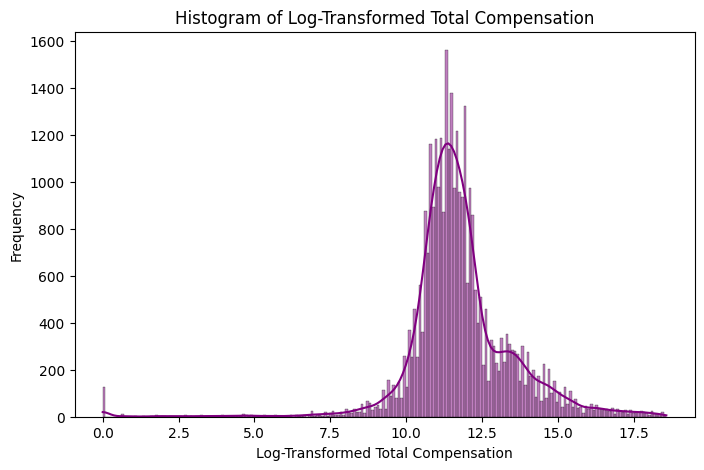

In [15]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["LogCompTotal"], bins='auto', kde=True, color="purple")

# Labels and title
plt.xlabel("Log-Transformed Total Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Total Compensation")

# Show plot
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [8]:
QUERY = """
SELECT YearsCodePro, COUNT(*) AS Freq
FROM main
WHERE YearsCodePro IS NOT NULL
GROUP BY YearsCodePro;
"""
pd.read_sql_query(QUERY, conn)

,YearsCodePro,Freq
0,1,2639
1,10,3251
2,11,1312
3,12,1777
4,13,1127
5,14,1082
6,15,1635
7,16,946
8,17,814
9,18,867


In [9]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)


In [10]:
# Define replacements for specific string values
replace_dict = {
    "Less than 1 year": 0.5,   # Represent as 0.5 years
    "More than 50 years": 51   # Represent as 51 years
}

# Apply replacements and convert to numeric
df["YearsCodePro"] = df["YearsCodePro"].replace(replace_dict)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

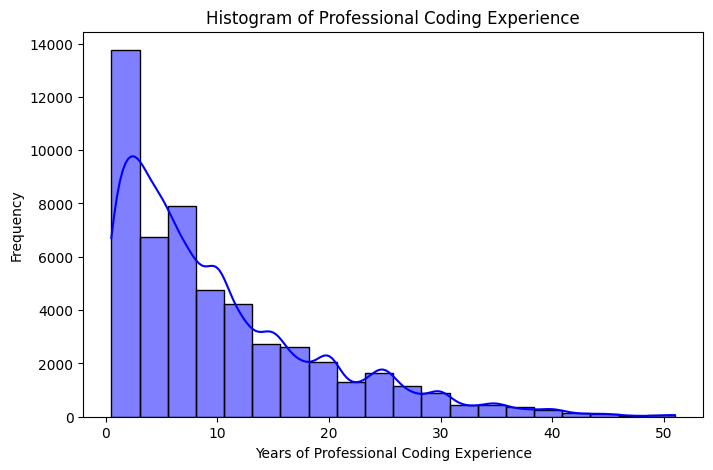

In [11]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["YearsCodePro"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Professional Coding Experience")

# Show plot
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [16]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,CompTotal
0,18-24 years old,2040000.0
1,25-34 years old,28000.0
2,35-44 years old,85000.0
3,35-44 years old,50000.0
4,25-34 years old,110000.0
...,...,...
33735,18-24 years old,36000.0
33736,25-34 years old,40000.0
33737,25-34 years old,61000.0
33738,35-44 years old,58000.0


In [20]:
# Convert Age to a categorical variable
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

# Ensure Age is categorical
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Convert CompTotal to numeric & drop NaNs
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal", "Age"])  # Ensure non-empty age groups

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]

/tmp/ipykernel_301/3436105624.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")


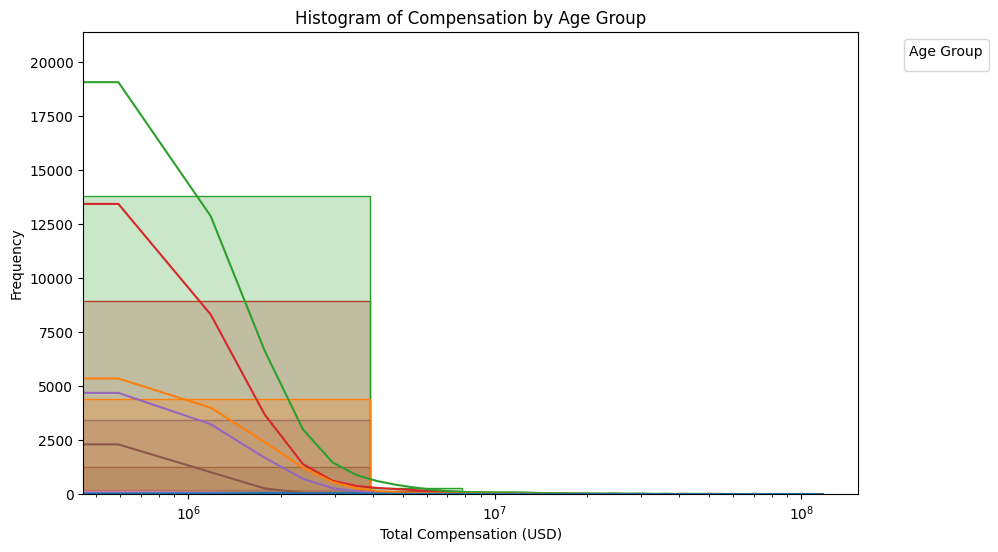

In [21]:
# Plot histograms for each Age group
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="CompTotal", hue="Age", bins=30, kde=True, element="step")

# Labels and title
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation by Age Group")
plt.xscale("log")  # Log scale for better visualization
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()


In [15]:
print(df.head())  # Check the first few rows
print(df.info()) 

               Age  CompTotal
0  18-24 years old  2040000.0
1  25-34 years old    28000.0
2  35-44 years old    85000.0
3  35-44 years old    50000.0
4  25-34 years old   110000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33740 entries, 0 to 33739
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        33726 non-null  category
 1   CompTotal  33740 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 297.0 KB
None


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [25]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching 
FROM main 
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,TimeSearching
0,35-44 years old,30-60 minutes a day
1,35-44 years old,30-60 minutes a day
2,45-54 years old,60-120 minutes a day
3,25-34 years old,15-30 minutes a day
4,25-34 years old,Less than 15 minutes a day
...,...,...
28906,18-24 years old,30-60 minutes a day
28907,18-24 years old,60-120 minutes a day
28908,25-34 years old,Less than 15 minutes a day
28909,25-34 years old,15-30 minutes a day


In [26]:
# Define mapping for TimeSearching
time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 4 hours a day": 270
}

# Apply mapping
df["TimeSearching"] = df["TimeSearching"].map(time_mapping)

# Drop NaNs if any mapping failed
df = df.dropna(subset=["TimeSearching"])
df

,Age,TimeSearching
0,35-44 years old,45.0
1,35-44 years old,45.0
2,45-54 years old,90.0
3,25-34 years old,22.5
4,25-34 years old,7.5
...,...,...
28906,18-24 years old,45.0
28907,18-24 years old,90.0
28908,25-34 years old,7.5
28909,25-34 years old,22.5


In [27]:
# Define ordered age categories
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

# Ensure Age is categorical
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Convert TimeSearching to numeric & drop NaNs
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")
df = df.dropna(subset=["TimeSearching", "Age"])  # Drop missing values

/tmp/ipykernel_301/2324757473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)
/tmp/ipykernel_301/2324757473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")


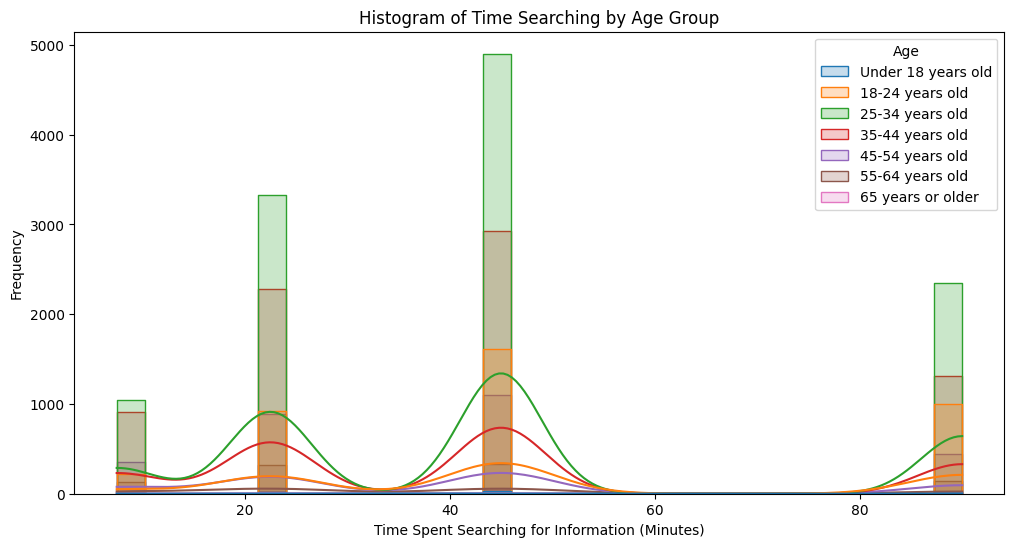

In [28]:
# Check if Age has valid categories left
if df["Age"].nunique() > 1:  # Ensure multiple age groups exist
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=df, x="TimeSearching", hue="Age", bins=30, kde=True, element="step")

    # Labels and title
    plt.xlabel("Time Spent Searching for Information (Minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Time Searching by Age Group")

    # Ensure legend appears
    handles, labels = ax.get_legend_handles_labels()
    if labels:  # Only add legend if labels exist
        plt.legend(handles, labels, title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show plot
    plt.show()
else:
    print("No valid Age groups available after filtering.")


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [22]:
## Write your code here
QUERY = """
WITH RECURSIVE SplitData AS (
    SELECT 
        SUBSTR(DatabaseWantToWorkWith, 1, INSTR(DatabaseWantToWorkWith || ';', ';') - 1) AS Database,
        SUBSTR(DatabaseWantToWorkWith, INSTR(DatabaseWantToWorkWith || ';', ';') + 1) AS Remaining
    FROM main
    WHERE DatabaseWantToWorkWith IS NOT NULL
    UNION ALL
    SELECT 
        SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1),
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1)
    FROM SplitData
    WHERE Remaining != '' 
)
SELECT Database, COUNT(*) AS Frequency
FROM SplitData
WHERE Database IS NOT NULL
GROUP BY Database
ORDER BY Frequency DESC
LIMIT 5;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Database,Frequency
0,PostgreSQL,24005
1,SQLite,13489
2,MySQL,12269
3,MongoDB,10982
4,Redis,10847


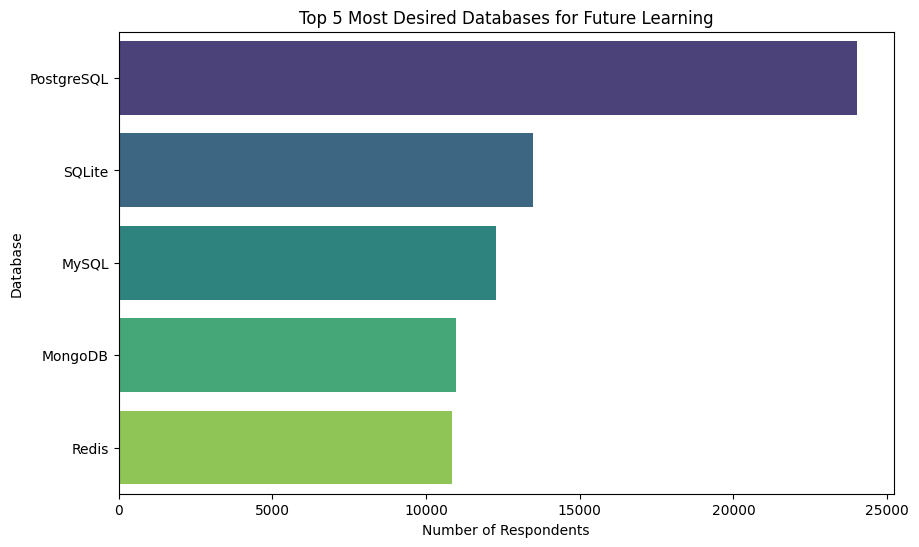

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Frequency", y="Database", hue="Database", palette="viridis", legend=False)

plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.title("Top 5 Most Desired Databases for Future Learning")
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [24]:
## Write your code here
QUERY = """
    SELECT RemoteWork, COUNT(*) AS Frequency
    FROM main
    WHERE RemoteWork IS NOT NULL
    GROUP BY RemoteWork
    ORDER BY Frequency DESC
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,RemoteWork,Frequency
0,"Hybrid (some remote, some in-person)",23015
1,Remote,20831
2,In-person,10960


/tmp/ipykernel_299/2290381528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Frequency", y="RemoteWork", palette="viridis")


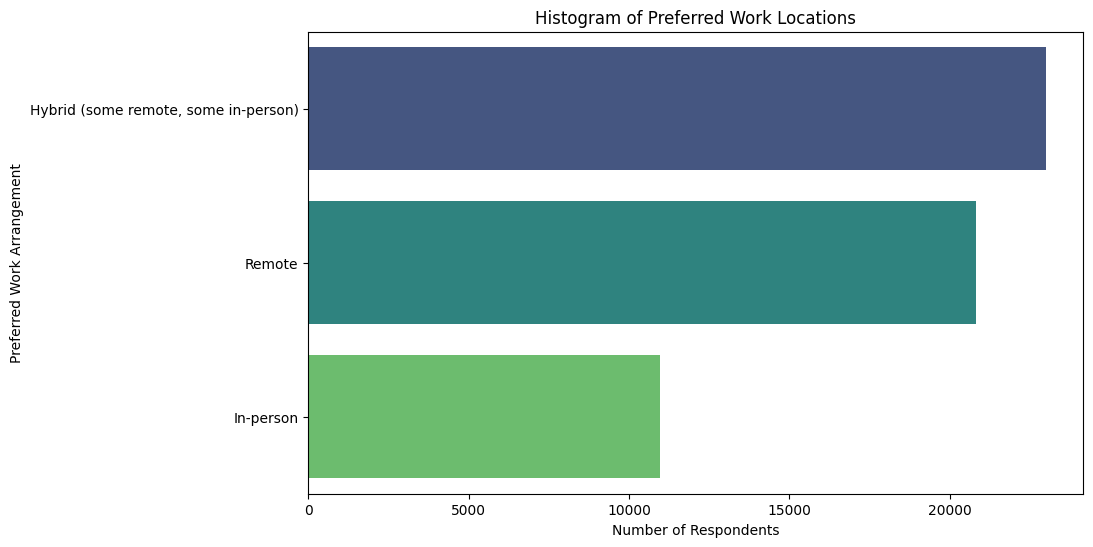

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Frequency", y="RemoteWork", palette="viridis")

plt.xlabel("Number of Respondents")
plt.ylabel("Preferred Work Arrangement")
plt.title("Histogram of Preferred Work Locations")
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [29]:
## Write your code here
QUERY = """
    SELECT Age, CompTotal
    FROM main
    WHERE Age IN ('45-54 years old', '55-64 years old') 
    AND CompTotal IS NOT NULL
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,CompTotal
0,45-54 years old,95000.0
1,45-54 years old,195000.0
2,55-64 years old,54000.0
3,45-54 years old,145000.0
4,55-64 years old,80000.0
...,...,...
4790,45-54 years old,40000.0
4791,45-54 years old,250000.0
4792,45-54 years old,250000.0
4793,45-54 years old,157000.0


In [30]:
# Define numeric mapping for age groups
age_mapping = {
    '45-54 years old': 49.5,
    '55-64 years old': 59.5
}

# Filter for ages 45-60
df_filtered = df[df["Age"].isin(age_mapping.keys())].copy()
df_filtered["AgeNumeric"] = df_filtered["Age"].map(age_mapping)

# Convert CompTotal to numeric and drop NaNs
df_filtered["CompTotal"] = pd.to_numeric(df_filtered["CompTotal"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["CompTotal"])


/tmp/ipykernel_301/1609982170.py:17: RuntimeWarning: divide by zero encountered in log10
  np.log10(df_filtered["CompTotal"].min()),
/opt/conda/lib/python3.12/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.12/site-packages/numpy/_core/function_base.py:172: RuntimeWarning: invalid value encountered in add
  y += start


/tmp/ipykernel_301/569808455.py:4: RuntimeWarning: divide by zero encountered in log10
  np.log10(df_filtered["CompTotal"].min()),
/opt/conda/lib/python3.12/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.12/site-packages/numpy/_core/function_base.py:172: RuntimeWarning: invalid value encountered in add
  y += start
/opt/conda/lib/python3.12/site-packages/seaborn/distributions.py:669: FutureWarning: The behavior of Series.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  thin_bar_idx = hist_metadata["widths"].idxmin()


KeyError: nan

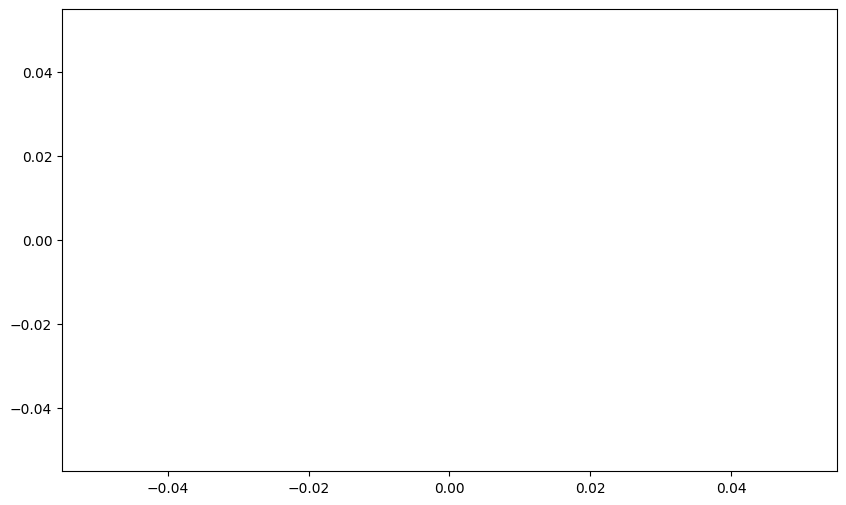

In [32]:
# Plot histogram
# **Fix: Handle extreme variation using log-based binning**
bin_edges = np.logspace(
    np.log10(df_filtered["CompTotal"].min()), 
    np.log10(df_filtered["CompTotal"].max()), 
    30  # Adjust the number of bins as needed
)

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, x="CompTotal", bins=bin_edges, kde=True)

# Labels and title
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation for Ages 45-60")
plt.xscale("log")  # Log scale for better readability

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [34]:
## Write your code here
QUERY = """
    SELECT JobSat, YearsCodePro
    FROM main
    WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,JobSat,YearsCodePro
0,8.0,12
1,5.0,27
2,10.0,10
3,6.0,Less than 1 year
4,9.0,18
...,...,...
28351,8.0,17
28352,5.0,10
28353,8.0,2
28354,8.0,7


In [35]:
# Mapping YearsCodePro categories to numeric values
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Replace mapped values and convert to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace(years_mapping)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# **Ensure JobSat is categorical**
df['JobSat'] = df['JobSat'].astype('category')

# **Drop missing JobSat values to ensure legend appears**
df_filtered = df.dropna(subset=['JobSat'])

/tmp/ipykernel_301/2953502455.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc="upper left")


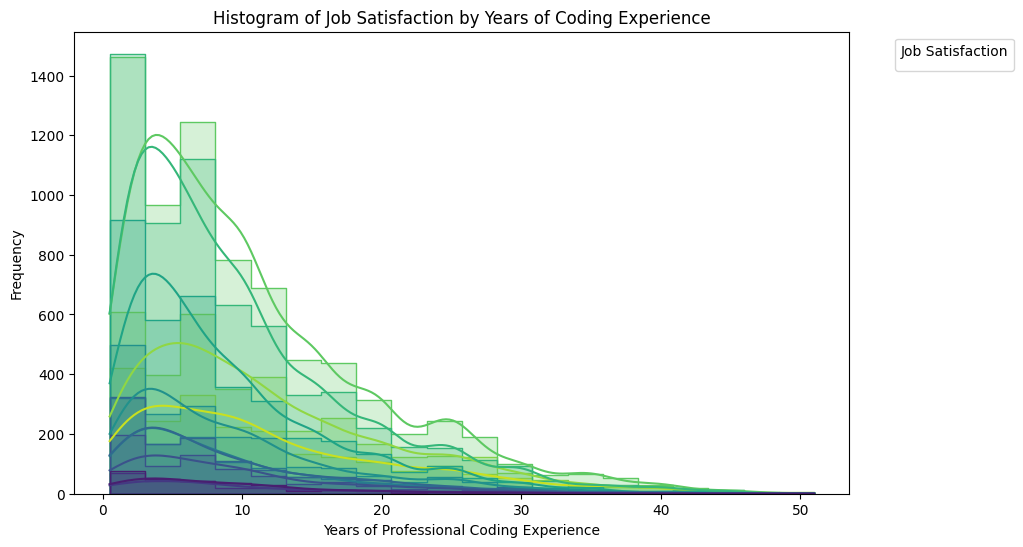

In [36]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_filtered, x="YearsCodePro", hue="JobSat", bins=20, kde=True, 
    element="step", palette="viridis"
)

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Job Satisfaction by Years of Coding Experience")

# **Explicitly set legend title**
legend = plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.gca().get_legend().set_title("Job Satisfaction")

# Show plot
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [32]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
